# Read data into pandas

In [1]:
import pandas as pd
import os

In [6]:
data_path = 'data/'
raw_data = pd.read_csv(os.path.join(data_path, '4AprilSurveyAnswers(1-275).csv'))
raw_data = raw_data.drop(columns=['Email', 'Name'])

In [25]:
scen1 = 'How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine?'
scen2 = 'How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine when working with HawkAI?'
scen3 = 'How much, on a scale of 1 to 10, would you trust the diagnosis of Dr Medicine when working with HouseAI?'
scen4 = 'How much, on a scale of 1 to 10, would you trust the diagnosis of the AI tool HouseAI when working by itself?'
raw_data

,ID,Start time,Completion time,"Do you work, or have you worked, in healthcare?\nFor example in a hospital or care centre","In your work, how often are you involved in high-stakes decision making?\n\nBy ""high-stakes decision making"" we mean making decisions that are highly impactful.\nHigh stakes decisions occur in many ...","How experienced are you with AI?\n\n1: I haven't worked with AI, or don't know if I've worked with AI\n\n5: I have used AI tools, but don't know how they work\n\n10: I have researched or developed AI, o...","How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine?","How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine when working with HawkAI?","How much, on a scale of 1 to 10, would you trust the diagnosis of Dr Medicine when working with HouseAI?","How much, on a scale of 1 to 10, would you trust the diagnosis of the AI tool HouseAI when working by itself?"
0,9,3/14/22 12:59:04,3/14/22 13:01:26,No,7,2,10,10,7,5
1,10,3/14/22 13:02:18,3/14/22 13:03:56,No,2,1,9,10,9,7
2,11,3/14/22 13:01:56,3/14/22 13:05:26,No,6,6,8,7,8,9
3,12,3/14/22 13:08:48,3/14/22 13:10:34,Yes,9,2,8,4,2,1
4,13,3/14/22 13:10:14,3/14/22 13:15:56,No,5,7,7,8,5,1
...,...,...,...,...,...,...,...,...,...,...
270,279,4/1/22 8:24:06,4/1/22 8:27:46,Yes,5,5,5,6,7,7
271,280,4/1/22 11:51:49,4/1/22 11:55:00,Yes,5,7,9,8,6,6
272,281,4/1/22 15:56:31,4/1/22 15:58:53,Yes,8,5,8,9,9,9
273,282,4/4/22 10:35:25,4/4/22 10:45:33,Yes,5,1,8,8,9,1


# Trust Ranking per answer

This ranks each answers from 1-4 no matter how much the trust was, 1 highest ranking, 4 lowest ranking

In [17]:
df = pd.DataFrame(data={
    'scen1': [10, 3],
    'scen3': [5, 2],
    'scen4': [8, 2],
    'scen5': [6, 10],


                        })
df

,scen1,scen3,scen4,scen5
0,10,5,8,6
1,3,2,2,10


In [18]:
df.rank(axis=1, method='min')

,scen1,scen3,scen4,scen5
0,4.0,1.0,3.0,2.0
1,3.0,1.0,1.0,4.0


In [21]:
raw_data.columns

Index(['ID', 'Start time', 'Completion time',
       'Do you work, or have you worked, in healthcare?\nFor example in a hospital or care centre',
       'In your work, how often are you involved in high-stakes decision making?\n\nBy "high-stakes decision making" we mean making decisions that are highly impactful.\nHigh  stakes decisions occur in many ...',
       'How experienced are you with AI?\n\n1: I haven't worked with AI, or don't know if I've worked with AI\n\n5: I have used AI tools, but don't know how they work\n\n10: I have researched or developed AI, o...',
       'How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine?',
       'How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine when working with HawkAI?',
       'How much, on a scale of 1 to 10, would you trust the diagnosis of Dr Medicine when working with HouseAI?',
       'How much, on a scale of 1 to 10, would you trust the diagnosis of the AI tool HouseAI when working by its

In [39]:
ranked_df = raw_data[[scen1, scen2, scen3, scen4]].rank(axis=1, method='min').astype(int)
ranked_df

,"How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine?","How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine when working with HawkAI?","How much, on a scale of 1 to 10, would you trust the diagnosis of Dr Medicine when working with HouseAI?","How much, on a scale of 1 to 10, would you trust the diagnosis of the AI tool HouseAI when working by itself?"
0,3,3,2,1
1,2,4,2,1
2,2,1,2,4
3,4,3,2,1
4,3,4,2,1
...,...,...,...,...
270,1,2,3,3
271,4,3,1,1
272,1,2,2,2
273,2,2,4,1


In [61]:
value_c = ranked_df.apply(pd.Series.value_counts)
value_c

,"How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine?","How much, on a scale of 1 to 10, do you trust the diagnosis of Dr Medicine when working with HawkAI?","How much, on a scale of 1 to 10, would you trust the diagnosis of Dr Medicine when working with HouseAI?","How much, on a scale of 1 to 10, would you trust the diagnosis of the AI tool HouseAI when working by itself?"
1,107,55,70,176
2,67,75,125,49
3,63,84,57,42
4,38,61,23,8


Text(0, 0.5, 'Rank: 1 lowest, 4 highest')

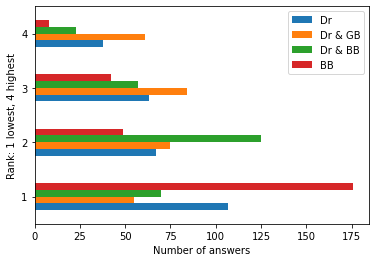

In [62]:
value_c = value_c.rename(columns={scen1 : 'Dr', scen2 : 'Dr & GB', scen3 : 'Dr & BB', scen4 : 'BB'})
ax = value_c.plot.barh()
ax.set_xlabel('Number of answers')
ax.set_ylabel('Rank: 1 lowest, 4 highest')